# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 25

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,22.807018,130,107.462550,5.7,4.711819,5.986852,4.928852,2.046684
112,Arrizabalaga,Chelsea,47,3.947368,15,17.292406,3.8,4.380743,6.986341,4.304143,2.020686
560,Kelleher,Liverpool,45,2.000000,10,8.242164,5.0,4.121082,4.331484,4.261393,1.942697
96,Pope,Burnley,56,24.000000,120,107.897550,5.0,4.495731,3.871748,4.564811,1.899793
597,Sánchez,Brighton,45,14.047619,59,55.100552,4.2,3.922412,5.332208,4.119142,1.849043
431,Fabianski,West Ham,50,24.146341,99,97.643704,4.1,4.043830,3.535488,3.835938,1.808456
516,Areola,Fulham,45,23.947368,91,87.683939,3.8,3.661527,3.258431,3.492357,1.726060
278,Ederson,Manchester City,61,23.958333,115,100.920485,4.8,4.212333,3.911353,4.301463,1.705524
8,Leno,Arsenal,50,24.210526,92,89.285188,3.8,3.687866,2.664462,3.629957,1.649264


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.960509,7.0,5.240127,NaN,5.518024,2.498133
277,Cancelo,Manchester City,61,20.188679,107,108.037950,5.3,5.351412,3.319157,5.388184,2.166724
273,Stones,Manchester City,52,14.923077,97,73.671820,6.5,4.936771,2.773946,5.000444,2.164917
75,Bernardo,Brighton,39,2.941176,5,11.608490,1.7,3.946887,NaN,4.157811,1.998584
123,James,Chelsea,50,19.189189,71,84.561893,3.7,4.406747,4.590534,4.403237,1.970757
556,Dias,Manchester City,61,21.836735,107,102.673158,4.9,4.701855,3.854141,4.765205,1.903725
435,Cresswell,West Ham,58,25.000000,120,112.904957,4.8,4.516198,5.390624,4.240324,1.875249
283,Zinchenko,Manchester City,55,11.063830,52,48.627715,4.7,4.395197,4.174141,4.471890,1.874118
109,Rüdiger,Chelsea,46,10.000000,46,40.040762,4.6,4.004076,5.047802,3.949789,1.866910


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,61,19.090909,126,109.842652,6.6,5.753663,6.578017,5.641858,2.329590
301,Lingard,West Ham,59,4.000000,34,20.255515,8.5,5.063879,NaN,4.904372,2.084766
302,Fernandes,Manchester Utd,116,25.000000,190,170.567043,7.6,6.822682,7.794167,6.110429,2.003208
105,Jorginho,Chelsea,47,17.045455,75,72.405803,4.4,4.247807,5.335644,4.402200,1.959367
24,Saka,Arsenal,52,21.904762,92,97.569759,4.2,4.454272,3.646952,4.324312,1.953327
272,De Bruyne,Manchester City,118,19.038462,99,123.828478,5.2,6.504122,2.859365,6.344902,1.893423
570,Raphinha,Leeds United,54,20.000000,92,86.931192,4.6,4.346560,5.792155,4.258738,1.870461
37,Grealish,Aston Villa,76,21.864407,129,112.595932,5.9,5.149736,3.277090,5.280898,1.868006
284,Foden,Manchester City,61,19.183673,94,84.207283,4.9,4.389529,5.738577,4.332160,1.777268


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
665,Maja,Fulham,55,4.000000,18,19.800000,4.5,4.950000,NaN,4.870734,2.110687
202,Bamford,Leeds United,69,25.000000,140,129.111457,5.6,5.164458,4.692376,5.033109,1.966076
506,Wilson,Newcastle Utd,66,21.090909,116,105.398593,5.5,4.997347,5.765906,4.958855,1.945215
388,Kane,Tottenham,111,22.142857,155,138.510754,7.0,6.255324,5.100000,6.284426,1.877536
224,Vardy,Leicester City,101,20.983607,128,123.517889,6.1,5.886399,4.895477,5.543927,1.852205
514,Watkins,Aston Villa,65,23.111111,104,106.485729,4.5,4.607556,3.460000,4.690178,1.807232
437,Antonio,West Ham,65,16.000000,72,72.759296,4.5,4.547456,4.373859,4.343536,1.783659
164,Calvert-Lewin,Everton,77,21.016949,124,103.218593,5.9,4.911207,5.619153,5.018626,1.769876
68,Maupay,Brighton,61,22.857143,80,94.566432,3.5,4.137281,2.920000,4.171283,1.675136


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,116,25.000000,190,170.567043,7.6,6.822682,6.110429,2.003208
272,De Bruyne,Manchester City,118,19.038462,99,123.828478,5.2,6.504122,6.344902,1.893423
388,Kane,Tottenham,111,22.142857,155,138.510754,7.0,6.255324,6.284426,1.877536
254,Salah,Liverpool,126,24.117647,164,143.425194,6.8,5.946898,5.676811,1.675349
224,Vardy,Leicester City,101,20.983607,128,123.517889,6.1,5.886399,5.543927,1.852205
271,Gündogan,Manchester City,61,19.090909,126,109.842652,6.6,5.753663,5.641858,2.329590
251,Mané,Liverpool,118,22.040816,108,122.382416,4.9,5.552536,5.291819,1.616406
390,Son,Tottenham,95,24.090909,159,129.220754,6.6,5.363880,5.438941,1.740273
277,Cancelo,Manchester City,61,20.188679,107,108.037950,5.3,5.351412,5.388184,2.166724


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,61,19.090909,6.6,5.753663,6.578017,5.629552,5.641858,2.329590
301,Lingard,West Ham,59,4.000000,8.5,5.063879,NaN,4.399564,4.904372,2.084766
105,Jorginho,Chelsea,47,17.045455,4.4,4.247807,5.335644,4.038031,4.402200,1.959367
24,Saka,Arsenal,52,21.904762,4.2,4.454272,3.646952,4.092442,4.324312,1.953327
570,Raphinha,Leeds United,54,20.000000,4.6,4.346560,5.792155,4.414292,4.258738,1.870461
284,Foden,Manchester City,61,19.183673,4.9,4.389529,5.738577,4.339510,4.332160,1.777268
33,Hourihane,Aston Villa,59,4.000000,5.0,4.219140,NaN,4.334103,4.319071,1.736992
23,Smith Rowe,Arsenal,43,11.052632,3.8,3.598645,3.062389,3.365560,3.518606,1.735420
474,Neto,Wolves,57,24.883721,4.3,4.088649,4.558669,3.714825,3.871935,1.712547


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
302,Fernandes,Manchester Utd,116,25.000000,190,170.567043,7.6,6.822682,7.794167,6.110429,2.003208
112,Arrizabalaga,Chelsea,47,3.947368,15,17.292406,3.8,4.380743,6.986341,4.304143,2.020686
239,Justin,Leicester City,50,22.954545,101,91.574010,4.4,3.989363,6.618239,3.984588,1.784097
271,Gündogan,Manchester City,61,19.090909,126,109.842652,6.6,5.753663,6.578017,5.641858,2.329590
120,Mount,Chelsea,68,24.146341,99,103.074938,4.1,4.268760,6.076950,4.394912,1.636995
67,Veltman,Brighton,43,18.750000,60,67.729127,3.2,3.612220,6.041449,3.815351,1.741967
466,Neves,Wolves,51,23.870968,74,77.842142,3.1,3.260955,6.010927,3.079487,1.443975
102,Azpilicueta,Chelsea,57,15.000000,69,58.797575,4.6,3.919838,6.007802,3.885740,1.641840
12,Martínez,Aston Villa,53,22.807018,130,107.462550,5.7,4.711819,5.986852,4.928852,2.046684


In [11]:
metric = 'next5_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,19.038462,99,123.828478,5.2,6.504122,6.344902,1.893423
388,Kane,Tottenham,111,22.142857,155,138.510754,7.0,6.255324,6.284426,1.877536
302,Fernandes,Manchester Utd,116,25.000000,190,170.567043,7.6,6.822682,6.110429,2.003208
254,Salah,Liverpool,126,24.117647,164,143.425194,6.8,5.946898,5.676811,1.675349
271,Gündogan,Manchester City,61,19.090909,126,109.842652,6.6,5.753663,5.641858,2.329590
224,Vardy,Leicester City,101,20.983607,128,123.517889,6.1,5.886399,5.543927,1.852205
39,Hause,Aston Villa,44,4.000000,28,20.960509,7.0,5.240127,5.518024,2.498133
390,Son,Tottenham,95,24.090909,159,129.220754,6.6,5.363880,5.438941,1.740273
277,Cancelo,Manchester City,61,20.188679,107,108.037950,5.3,5.351412,5.388184,2.166724


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,20.983607,6.1,5.886399,5.829107,1.852205,14.6,2.5,17.1,0.814922
254,Salah,Liverpool,126,24.117647,6.8,5.946898,5.612553,1.675349,12.7,3.5,16.2,0.671707
202,Bamford,Leeds United,69,25.000000,5.6,5.164458,5.287535,1.966076,12.6,2.7,15.3,0.612000
302,Fernandes,Manchester Utd,116,25.000000,7.6,6.822682,6.327824,2.003208,11.6,9.1,20.7,0.828000
514,Watkins,Aston Villa,65,23.111111,4.5,4.607556,4.814135,1.807232,11.4,2.1,13.5,0.584135
388,Kane,Tottenham,111,22.142857,7.0,6.255324,6.384947,1.877536,11.3,5.0,16.3,0.736129
251,Mané,Liverpool,118,22.040816,4.9,5.552536,5.229417,1.616406,10.5,3.5,14.0,0.635185
164,Calvert-Lewin,Everton,77,21.016949,5.9,4.911207,5.179161,1.769876,10.3,0.9,11.2,0.532903
68,Maupay,Brighton,61,22.857143,3.5,4.137281,4.528801,1.675136,10.0,2.2,12.2,0.533750


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week23,...,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87,57.220000,3.218625,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7,100,25.0,100.0,0.000000,6,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.2,0.3,NaN,0.0,1.1,NaN,NaN,NaN,NaN,0.2,1.5,NaN,NaN,0.2,0.3,0.1,0.2,0.0,NaN,NaN,NaN,2.4,1.0,1.6,1.00000,6.400000,1.800000,3.200000,NaN,2.3,8.700000,NaN,NaN,NaN,NaN,2.800000,13.300000,NaN,NaN,1.800000,3.500000,2.400000,2.800000,2.3,NaN,4
235,105.289182,4.380030,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,346,NaN,NaN,7.357021,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,0.0,0.1,0.0,0.2,0.5,NaN,0.9,0.6,0.2,0.2,0.1,0.2,0.5,0.6,0.1,0.1,0.0,0.0,0.8,0.2,0.4,9.787626,4.036883,1.8,NaN,1.0,2.22313,3.132871,2.165299,4.606531,5.318731,NaN,11.197209,9.93372,6.047554,4.765299,3.048812,3.149569,8.746978,9.787626,2.867879,2.701897,2.548812,2.367879,7.367879,2.0,4.024724,0


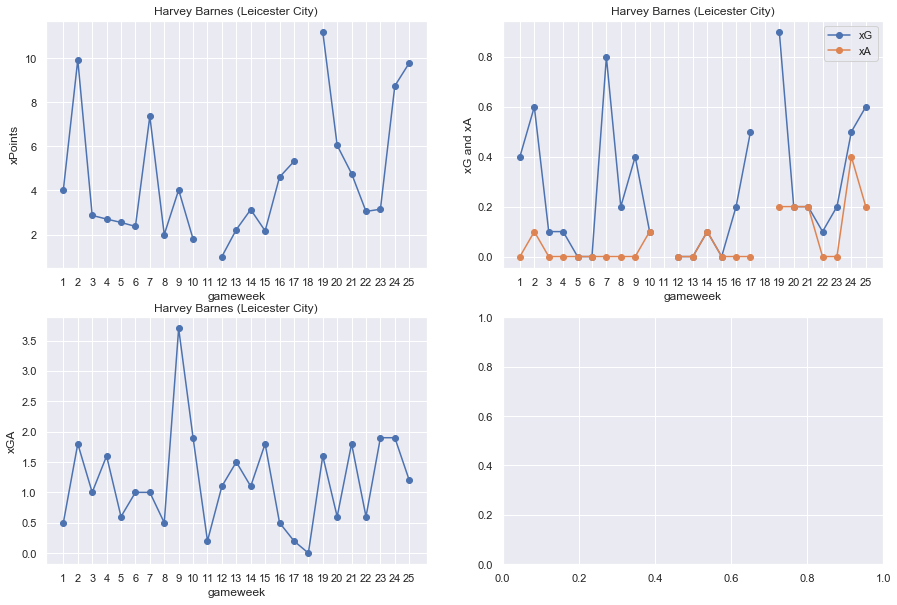

In [22]:
# find player index
name_string = 'Barnes'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
ix = 235

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [23]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [24]:
my_starting11 = [12,109,558,277,271,302,272,37,388,202,224] #vardy=224, grealish=37, mane=251
my_subs = [597,461,23,74]

In [25]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 66.46092512255336
Expected points next gameweek: 64.42644399860288


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,22.807018,5.7,4.711819,5.986852,4.658143,4.714894,4.928852,2.046684
109,Rüdiger,Chelsea,46,10.000000,4.6,4.004076,5.047802,4.599202,3.574979,3.949789,1.866910
558,Coufal,West Ham,47,21.025641,3.9,4.034550,3.855488,4.260544,3.120687,3.763789,1.860999
277,Cancelo,Manchester City,61,20.188679,5.3,5.351412,3.319157,4.552274,5.513710,5.388184,2.166724
271,Gündogan,Manchester City,61,19.090909,6.6,5.753663,6.578017,6.510632,5.629552,5.641858,2.329590
302,Fernandes,Manchester Utd,116,25.000000,7.6,6.822682,7.794167,6.733575,6.327824,6.110429,2.003208
272,De Bruyne,Manchester City,118,19.038462,5.2,6.504122,2.859365,5.738727,6.315477,6.344902,1.893423
37,Grealish,Aston Villa,76,21.864407,5.9,5.149736,3.277090,4.153687,5.342785,5.280898,1.868006
388,Kane,Tottenham,111,22.142857,7.0,6.255324,5.100000,6.081103,6.384947,6.284426,1.877536



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,14.047619,4.2,3.922412,5.332208,4.453178,4.717222,4.119142,1.849043
461,Saïss,Wolves,49,16.136364,4.4,3.873777,2.986365,2.932642,3.518710,3.582822,1.749994
23,Smith Rowe,Arsenal,43,11.052632,3.8,3.598645,3.062389,3.607224,3.365560,3.518606,1.735420
74,White,Brighton,44,24.137931,2.9,3.166744,4.492208,4.291889,3.993915,3.366285,1.509686


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)